In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%notebook inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

reading file and checking head 

In [3]:
df = pd.read_csv("diamonds.csv")

In [4]:
print(df.shape)
df.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


EDA

In [15]:
sns.set_style("darkgrid")

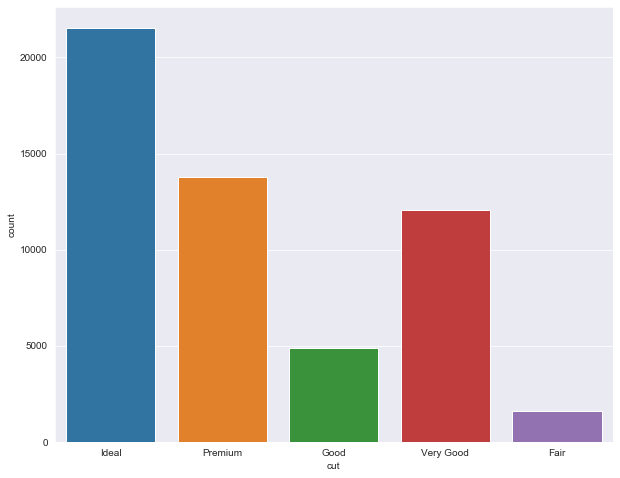

In [16]:
plt.figure(figsize=(10,8))
sns.countplot("cut", data=df)

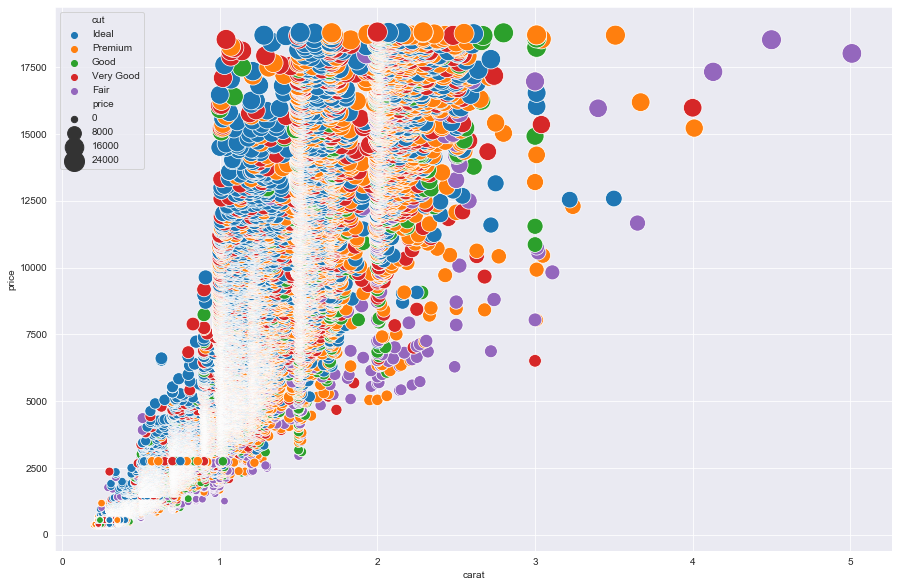

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot("carat", "price", hue= "cut", data= df, size="price", sizes=(40,400))
plt.show()

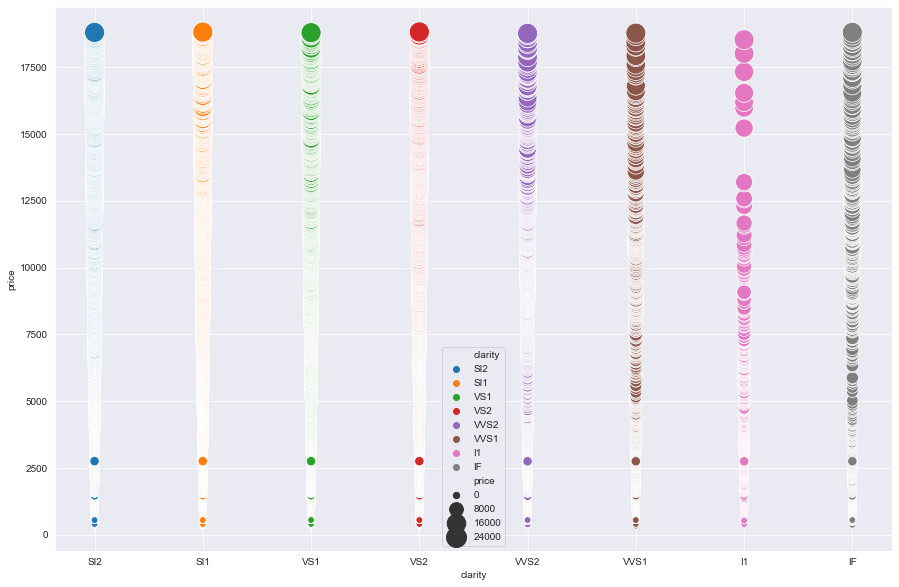

In [326]:
plt.figure(figsize=(15,10))
sns.scatterplot("clarity", "price", data= df, size="price", hue="clarity", sizes=(40,400))
plt.show()

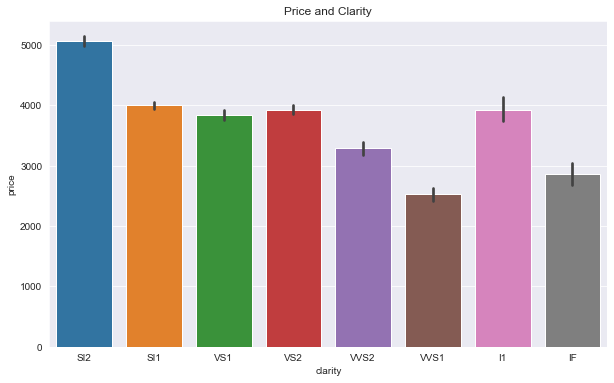

In [328]:
plt.figure(figsize=(10,6))
plt.title("Price and Clarity")
sns.barplot("clarity", "price", data=df)

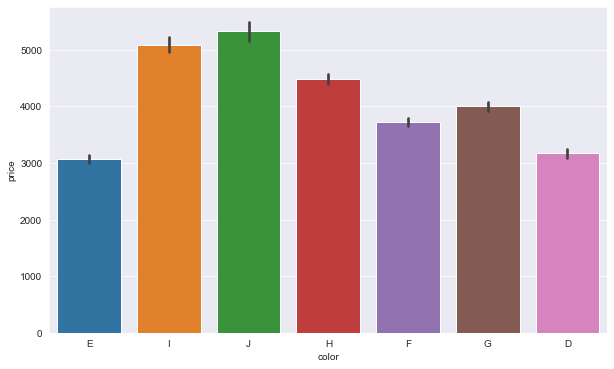

In [18]:
plt.figure(figsize=(10,6))
sns.barplot("color", "price", data=df)

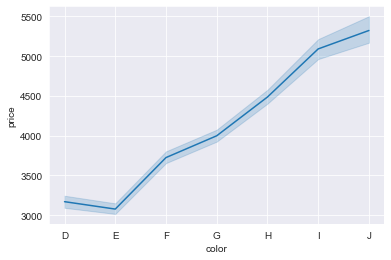

In [19]:
sns.lineplot("color", "price", data=df)

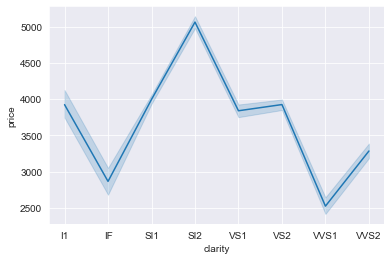

In [329]:
sns.lineplot("clarity", "price", data=df)

checking categorical data

In [20]:
df1 = df.drop("Unnamed: 0", axis = 1)

In [21]:
for col in df1.select_dtypes("object"):
    print(col,len(df1[col].unique()), df1[col].unique())
    print("")

cut 5 ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

color 7 ['E' 'I' 'J' 'H' 'F' 'G' 'D']

clarity 8 ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



encoding data

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [22]:
df2 = df1.copy()

In [370]:
df2["cut"] = df2.replace({"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4})

df2["clarity"] = df2.replace({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})

In [371]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0.23,0.23,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0.21,0.21,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0.23,0.23,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0.29,0.29,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,0.31,0.31,0.31,63.3,58.0,335,4.34,4.35,2.75


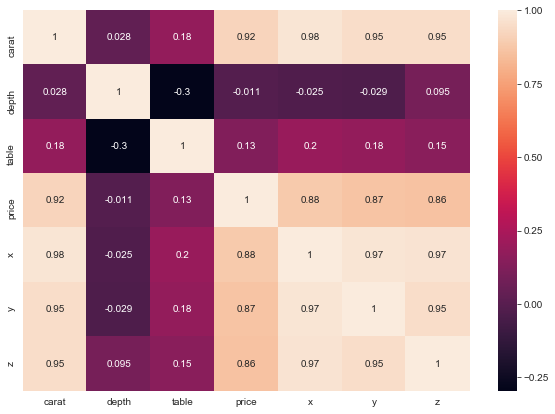

In [365]:
corr = df2.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True)

In [376]:
models = {
    "                    Linear Regression": LinearRegression(),
    "                                Ridge": Ridge(),
    "                                Lasso": Lasso(),
    "                  K Nearest Neighbors": KNeighborsRegressor(n_neighbors=49),
    "                        Random Forest": RandomForestRegressor(max_depth=5),
}

Splitting data

In [372]:
X = df2.drop(["price", "color", "table", "depth"], axis = 1)
y = df2["price"]

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [331]:
error = []

for i in range(1,50):
    knn = KNeighborsRegressor(n_neighbors = i )
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

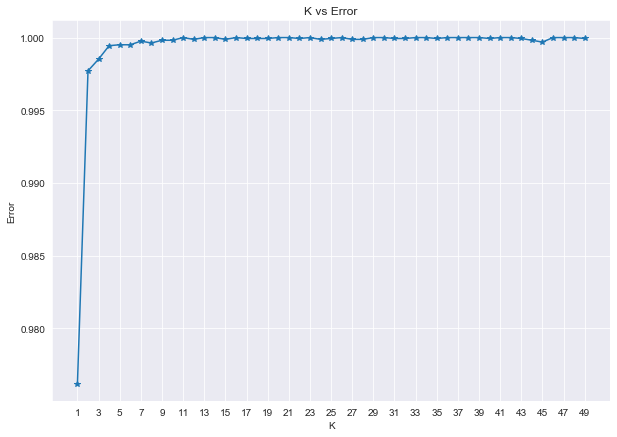

In [332]:
plt.figure(figsize=(10,7))
plt.xlabel("K")
plt.ylabel("Error")
plt.plot(range(1,50), error, marker = "*")
plt.xticks(range(1,50,2))
plt.title("K vs Error")
plt.show()


In [373]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                    Linear Regression trained.
                                Ridge trained.
                                Lasso trained.
                  K Nearest Neighbors trained.
                        Random Forest trained.


In [374]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')
                     

                    Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.84631
Training Accuracy: 0.85482
------------------------------------------------------------


                                Ridge
------------------------------------------------------------
Testing Accuracy: 0.84633
Training Accuracy: 0.85482
------------------------------------------------------------


                                Lasso
------------------------------------------------------------
Testing Accuracy: 0.84730
Training Accuracy: 0.85480
------------------------------------------------------------


                  K Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.88285
Training Accuracy: 0.88547
------------------------------------------------------------


                        Random Forest
------------------------------------------------------------
Testing Accuracy: 0.88037
Training Accura

Bagging

In [199]:
bg_model = BaggingRegressor(KNeighborsRegressor(n_neighbors= 25), n_estimators=20, random_state=101, max_samples=0.5)

In [200]:
bg_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=25,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
                 random_state=101, verbose=0, warm_start=False)

In [201]:
bg_model.score(X_test, y_test)

0.8825774322998441

In [202]:
bg_model.score(X_train, y_train)

0.8852965747296123

# 2nd approach

In [316]:
df3 = df.copy()
df3.drop(['Unnamed: 0', 'color', 'table', 'cut'], axis=1, inplace=True)

In [317]:
dummies = pd.get_dummies(df3)

In [318]:
dummies.head()

,carat,depth,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0
1,0.21,59.8,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0
2,0.23,56.9,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0
3,0.29,62.4,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0
4,0.31,63.3,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0


In [319]:
dummies.drop(dummies.iloc[:,-2:], axis=1, inplace=True)

In [380]:
X = dummies.drop("price", axis = 1)
y = dummies["price"]

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [381]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                    Linear Regression trained.
                                Ridge trained.
                                Lasso trained.
                  K Nearest Neighbors trained.
                        Random Forest trained.
nn trained.


C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [382]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')
                     

                    Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.89816
Training Accuracy: 0.89786
------------------------------------------------------------


                                Ridge
------------------------------------------------------------
Testing Accuracy: 0.89815
Training Accuracy: 0.89785
------------------------------------------------------------


                                Lasso
------------------------------------------------------------
Testing Accuracy: 0.89838
Training Accuracy: 0.89783
------------------------------------------------------------


                  K Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.93635
Training Accuracy: 0.93831
------------------------------------------------------------


                        Random Forest
------------------------------------------------------------
Testing Accuracy: 0.91596
Training Accura

Bagging

In [358]:
bg_model = BaggingRegressor(KNeighborsRegressor(n_neighbors= 25), n_estimators=30, random_state=101, max_samples=0.3)

In [359]:
bg_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=25,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.3, n_estimators=30, n_jobs=None, oob_score=False,
                 random_state=101, verbose=0, warm_start=False)

In [360]:
bg_model.score(X_test, y_test)

0.9351152097377612

In [361]:
bg_model.score(X_train, y_train)

0.9361480462609076